In [49]:
import pandas as pd
from matplotlib import pyplot as plt

In [50]:
df = pd.read_csv("results_1_to_1_different_scoring.csv")
df.columns

Index(['Unnamed: 0', 'rmse', 'oos_rmse', 'FGI', 'in_study_prediction',
       'in_study_labels', 'oos_prediction', 'oos_labels',
       'dimensionality_reduction', 'out_of_study', 'in_study',
       'feature_combinations'],
      dtype='object')

In [51]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps":[
        "heatmaps_*",
    ],
    "fft":[
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov":[
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch":[
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter":[
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration":[
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length":[
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration":[
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all":[
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
df["feature_combinations"] = df["feature_combinations"].map(inv_map)

<BarContainer object of 12 artists>

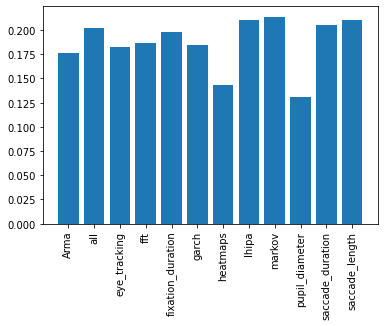

In [52]:
#MINIMUM RMSE PER FEATURE
minimum_rmse = df.groupby(by="feature_combinations").min()
plt.xticks(rotation=90)
plt.bar(minimum_rmse.index, minimum_rmse.loc[:, "rmse"])

<BarContainer object of 12 artists>

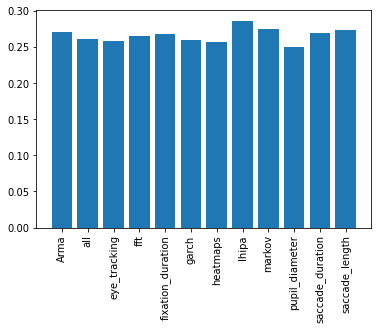

In [53]:
#MEAN RMSE PER FEATURE
minimum_rmse = df.groupby(by="feature_combinations").mean()
plt.xticks(rotation=90)
plt.bar(minimum_rmse.index, minimum_rmse.loc[:, "rmse"])

<BarContainer object of 3 artists>

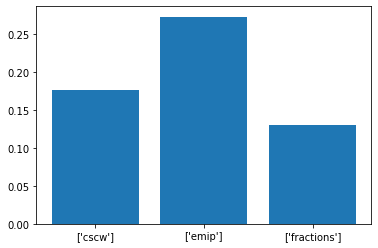

In [54]:
#MINIMUM RMSE PER DATASET
minimum_rmse = df.groupby(by="in_study").min()
plt.bar(minimum_rmse.index, minimum_rmse.loc[:, "rmse"])

<BarContainer object of 3 artists>

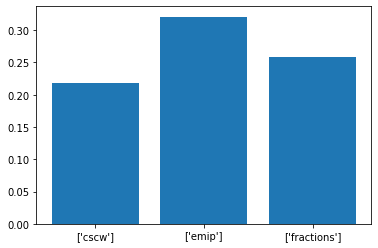

In [55]:
# MEAN RMSE PER DATASET
minimum_rmse = df.groupby(by="in_study").mean()
plt.bar(minimum_rmse.index, minimum_rmse.loc[:, "rmse"])

<BarContainer object of 3 artists>

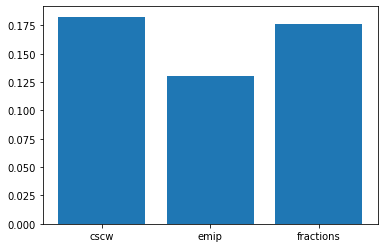

In [56]:
#MINIMUM RMSE PER oos DATASET
minimum_rmse = df.groupby(by="out_of_study").min()
plt.bar(minimum_rmse.index, minimum_rmse.loc[:, "rmse"])

<BarContainer object of 3 artists>

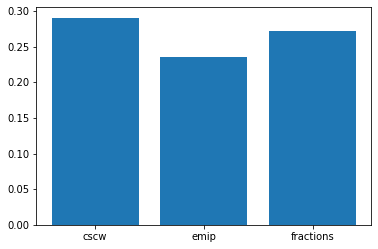

In [57]:
# MEAN RMSE PER oos DATASET
minimum_rmse = df.groupby(by="out_of_study").mean()
plt.bar(minimum_rmse.index, minimum_rmse.loc[:, "rmse"])